# Analysis of the Indian Startups Funding Data


# Introduction 
The given dataset contains information about Indian startups funding from 2018 to 2021. The data for each year of funding is in a separate csv file in the dataset provided. It has information such as the start-ups' details, the funding amounts received, and the investors' information. This analysis seeks to analyze and understand the dataset to help in decision making. We will glean insight from this dataset by answering the following questions.

# Hypothesis and Questions

1.	Which year has seen the most funding in terms of number of startups funded?
2.	Which year has seen the most funding in terms of funding amount?
3.	How much funds do startups generally get in India?
4.	What type of funding do startups in India generally receive?
5.	Do cities play a major role in funding? If yes, which cities are preferred by investors?
6.	Which industries are preferred or mostly favored by investors for funding?

The following hypothesis will also be tested

H1: Startup location and number of funding are positively correlated.
H0: Startup location has no relation with it getting funding/ Startup location has no relation with it receiving funding.

H1: The funding amount is positively related to the stage of funding.
H0: There is no relation between the funding amount and the stage of funding.


# Importing the necessary libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.set_option('display.float_format', lambda x: '%.9f' % x)


# Loading the datasets

The given dataset is made up of 4 separate files, with each file representing funding data for each year (2018,2019,2020, and 2021).
****Load the dataset for 2018,2019,2020 and 2021

In [2]:
# Loading the datasets into DataFrames

df_2018 = pd.read_csv("startup_funding2018.csv")
df_2019 = pd.read_csv("startup_funding2019.csv")
df_2020 = pd.read_csv("startup_funding2020.csv")
df_2021 = pd.read_csv("startup_funding2021.csv")

# Data Processing...........

***Exploring the datasets
Let us explore the various dataset to learn more about the data structure 

In [3]:
#Exploring the various datasets

df_2018.info()
#df_2018.head(20)
#df_2019.info()
#df_2020
#df_2020.info()
#df_2019.tail()
#df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


***OBSERVATIONS
1. We can see that the funding data for 2019, 2020 and 2021 have the same column structure(schema) whiles the 2018 dataset is different from the others. Lets list the columns in each dataset to compare.

In [4]:
#Exploring columns 2018
list(df_2018.columns)
#df_2020
#Exploring columns 2019
#list(df_2019.columns)
#Exploring columns 2020
#list(df_2021.columns)

['Company Name',
 'Industry',
 'Round/Series',
 'Amount',
 'Location',
 'About Company']

# OBSERVATIONS

We can see that the funding data for 2019, 2020 and 2021 have the same column structure(schema) whiles the 2018 dataset is different from the others. 
Since all the datasets have the same columns except that of 2018, we will edit it to conform with that of other years by doing the following
1. Rename the columns to match with that of 2019,2020, and 2021
2. Add the 'Funding_Year' column to all the datasets.

In [5]:
#Renaming the columns 
df_2018.rename(columns = {'Company Name':'Company/Brand','Industry':'Sector','Round/Series':'Stage',
                         'Location':'HeadQuarter','Industry':'Sector','About Company':'What it does',
                         'Amount':'Amount($)'},inplace= True)

***Let's add year of funding by naming it 'Funding_Year'. Since it is 2018 data, we assume the years are to be 2018. so we fill the columns with the value 2018. We will do same for other years.

In [6]:
#Adding column
df_2018['Funding_Year']="2018"
df_2019['Funding_Year']="2019"
df_2020['Funding_Year']="2020"
df_2021['Funding_Year']="2021"

***Now lets explore the 2018 data for missing values and data consistency.

In [7]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  526 non-null    object
 1   Sector         526 non-null    object
 2   Stage          526 non-null    object
 3   Amount($)      526 non-null    object
 4   HeadQuarter    526 non-null    object
 5   What it does   526 non-null    object
 6   Funding_Year   526 non-null    object
dtypes: object(7)
memory usage: 28.9+ KB


In [8]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   Funding_Year   89 non-null     object 
dtypes: float64(1), object(9)
memory usage: 7.1+ KB


In [9]:
missing_values = df_2019.isnull().sum().sort_values(ascending =True)
missing_values

Company/Brand     0
What it does      0
Investor          0
Amount($)         0
Funding_Year      0
Founders          3
Sector            5
HeadQuarter      19
Founded          29
Stage            46
dtype: int64

# Observations and Cleaning

1. From the results the 2018 data have 7 columns whiles the other dataset have 10 columns. Lets clean the data and make them consisten.
2. The 2018 data does not have 'Founded' column, since we won't be using that column to answer any of our questions will will drop it in the other datasets.
3. We will do same with the 'Founders' and 'Investor' columns too.

In [10]:
#Dropping columns 
df_2019.drop(columns=['Founders','Founded','Investor'],inplace = True)
df_2020.drop(columns=['Founders','Founded','Investor'],inplace = True)
df_2021.drop(columns=['Founders','Founded','Investor'],inplace = True)
df_2019
df_2018

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding_Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


In [11]:
#df_2018['Amount($)']
df1= df_2018[df_2018.isin(['—']).any(axis=1)]
#df1 = df_2019['Amount($)'].str.contains(" —")
df1


,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding_Year
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018
10,BizCrum Infotech Pvt. Ltd.,"B2B, Shoes",Seed,—,"Delhi, Delhi, India",Building Transactionary B2B Marketplaces,2018
11,Emojifi,Internet,Seed,—,"Bengaluru, Karnataka, India","Emojifi is an app that provides live emoji, st...",2018
...,...,...,...,...,...,...,...
510,Scholify,—,Pre-Seed,—,"Bengaluru, Karnataka, India",Edutech,2018
512,srJna,Education,Seed,—,"Jaipur, Rajasthan, India","SRJNA is a brand of Elation Edtech Pvt. Ltd., ...",2018
515,Heelium,"Fitness, Sporting Goods, Sports",Seed,—,"Pune, Maharashtra, India",Heelium is an athletic footwear and wearable s...,2018
518,Cleardekho,"Eyewear, Internet",Venture - Series Unknown,—,"Ghaziabad, Uttar Pradesh, India",Uttar Pradesh based online eyewear marketplace.,2018


From the output, the 'Amount($)' and 'Sector' columns of the 2018 data have some '-' values. so let's replace that of Amount($) with 0, and 'Undisclosed' for 'Sector'.

In [12]:
#Replacing undisclosed and - values 

df_2018['Amount($)'].replace(['—'],[0],inplace= True)
df_2018['Amount($)'].replace(['Undisclosed'],[0],inplace= True)
df_2018['Sector'].replace(['—'],['Undisclosed'],inplace= True)


df1= df_2018[df_2018.isin(['—']).any(axis=1)]
df1

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding_Year


# Let's clean the 2018 data by performing the following:

1. Remove extra words in sector column (The column contains words seperated by comma to describe the sector. Remove to avoid repetition)
2. Remove extra words in headquarter (The column contains words seperated by comma to as the address of the startups. Remove to maintain consistency)
3. Convert rupee amounts to dollars ( The column contains amount in rupee and in dollars, we convert all to dollars for consistency)

In [13]:
#removing extra words in sector column

df_2018['Sector']=df_2018['Sector'].apply(str)
df_2018['Sector']=df_2018['Sector'].str.split(',').str[0]
df_2018['Sector']=df_2018['Sector'].replace("'","",regex= True)
df_2018['Sector']


0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
                ...          
521                       B2B
522                   Tourism
523         Food and Beverage
524    Information Technology
525             Biotechnology
Name: Sector, Length: 526, dtype: object

In [14]:
#removing extra words in headquarter

df_2018['HeadQuarter']=df_2018['HeadQuarter'].apply(str)
df_2018['HeadQuarter']=df_2018['HeadQuarter'].str.split(',').str[0]
df_2018['HeadQuarter']=df_2018['HeadQuarter'].replace("'","",regex= True)


In [15]:
#converting rupee amounts to dollars
data18= df_2018
data18['Amount($)'] = data18['Amount($)'].apply(str)
data18['Amount1'] = data18['Amount($)'].str.rsplit('₹',n=2).str[1]
data18['Amount1'] = data18['Amount1'].replace(",","",regex=True)
data18['Amount1'] = data18['Amount1'].apply(float)
data18['Amount1'] = data18['Amount1'].fillna(0)
data18['Amount2'] = data18['Amount1'] * 0.0146
data18['Amount2'] = data18['Amount2'].replace(0,np.nan)
data18['Amount2'] = data18['Amount2'].fillna(data18['Amount($)'])
df_2018['Amount2'] = data18['Amount2'].fillna(data18['Amount($)'])
df_2018['Amount($)']= df_2018['Amount2'] 

df_2018.head(20)

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding_Year,Amount1,Amount2
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,0.000000000,250000
1,Happy Cow Dairy,Agriculture,Seed,584000.000000000,Mumbai,A startup which aggregates milk from dairy far...,2018,40000000.000000000,584000.000000000
2,MyLoanCare,Credit,Series A,949000.000000000,Gurgaon,Leading Online Loans Marketplace in India,2018,65000000.000000000,949000.000000000
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018,0.000000000,2000000
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,0.000000000,0
5,Hasura,Cloud Infrastructure,Seed,1600000,Bengaluru,Hasura is a platform that allows developers to...,2018,0.000000000,1600000
6,Tripshelf,Internet,Seed,233600.000000000,Kalkaji,Tripshelf is an online market place for holida...,2018,16000000.000000000,233600.000000000
7,Hyperdata.IO,Market Research,Angel,730000.000000000,Hyderabad,Hyperdata combines advanced machine learning w...,2018,50000000.000000000,730000.000000000
8,Freightwalla,Information Services,Seed,0,Mumbai,Freightwalla is an international forwarder tha...,2018,0.000000000,0
9,Microchip Payments,Mobile Payments,Seed,0,Bangalore,Microchip payments is a mobile-based payment a...,2018,0.000000000,0


In [16]:
#dropping extra columns created to aid convertion to rupees

df_2018.drop(columns=['Amount2','Amount1'],inplace = True)
df_2018            

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding_Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584000.000000000,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,949000.000000000,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,0,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,511000.000000000,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


In [17]:
#Replacing 'Undisclosed' amounts with 0

df_2018['Amount($)'].replace(['Undisclosed'],[0],inplace= True)
df_2018

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding_Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584000.000000000,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,949000.000000000,Gurgaon,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,B2B,Series C,225000000,Bangalore,"Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,Tourism,Series A,0,Haryana,HappyEasyGo is an online travel domain.,2018
523,Mombay,Food and Beverage,Seed,7500,Mumbai,Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,511000.000000000,Mumbai,Droni Tech manufacture UAVs and develop softwa...,2018


# Merging all dataset into a single dataframe

Now that all the data sets have the same structure, we can merge the 4 datasets to get a consolidated dataset

In [18]:
# Merging 2018,2019,2020 and 2021 datasets
data_sets = [df_2018,df_2019,df_2020,df_2021]
data = pd.concat(data_sets)
data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding_Year,Unnamed: 9
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN
1,Happy Cow Dairy,Agriculture,Seed,584000.000000000,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN
2,MyLoanCare,Credit,Series A,949000.000000000,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN
...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2021,NaN
1205,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,NaN
1206,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2021,NaN
1207,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,NaN


# Let's explore the consolidated data and check for missing values   

In [19]:
#data.head(10)
#data.tail(10)
data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding_Year,Unnamed: 9
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN
1,Happy Cow Dairy,Agriculture,Seed,584000.000000000,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN
2,MyLoanCare,Credit,Series A,949000.000000000,Gurgaon,Leading Online Loans Marketplace in India,2018,NaN
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN
...,...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2021,NaN
1205,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,NaN
1206,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2021,NaN
1207,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,NaN


In [20]:
#Checking for Number of missing values
missing_values = data.isnull().sum().sort_values(ascending =True)
missing_values

Company/Brand       0
What it does        0
Funding_Year        0
Amount($)           6
Sector             18
HeadQuarter       114
Stage             938
Unnamed: 9       2877
dtype: int64

In [21]:
#calculating the percentage of missing values
percentage_of_missing_values=(missing_values/data.isnull().count())*(100)
percentage_of_missing_values

Amount($)        0.208405696
Company/Brand    0.000000000
Funding_Year     0.000000000
HeadQuarter      3.959708232
Sector           0.625217089
Stage           32.580757207
Unnamed: 9      99.930531435
What it does     0.000000000
dtype: float64

# Observations

**From the results, there are alot of missing values in the dataset. 

1. Here we can see that we don't have the funding amount for 6 startups  in the 'Amount($)' column and hence we can drop them.
2. The 'Sector' column is missing 18 values so we will replace them with 'Undisclosed'.
3. We will repeat step 2 process for the 'Stage' and 'HeadQuater' columns by replacing them with 'Undisclosed'.

In [22]:
#Lets have a look at the missing data in the sector column 
nan_values = data[data['Sector'].isna()]
nan_values

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does,Funding_Year,Unnamed: 9
41,VMate,NaN,NaN,"$100,000,000",NaN,A short video platform,2019,NaN
49,Awign Enterprises,NaN,Series A,"$4,000,000",Bangalore,It supplies workforce to the economy,2019,NaN
52,TapChief,NaN,Pre series A,"$1,500,000",Bangalore,It connects individuals in need of advice in a...,2019,NaN
56,KredX,NaN,Series B,"$26,000,000",Bangalore,Invoice discounting platform,2019,NaN
57,m.Paani,NaN,Series A,"$5,500,000",Mumbai,It digitizes and organises local retailers,2019,NaN
518,Text Mercato,NaN,Series A,"$649,600",Bangalore,Cataloguing startup that serves ecommerce plat...,2020,NaN
569,Magicpin,NaN,Series D,"$7,000,000",Gurugram,"It is a local discovery, rewards, and commerce...",2020,NaN
687,Leap Club,NaN,Pre seed round,"$340,000",Gurugram,Community led professional network for women,2020,NaN
699,Juicy Chemistry,NaN,Series A,"$650,000",NaN,It focuses on organic based skincare products,2020,NaN
707,Magicpin,NaN,NaN,"$3,879,000",Gurugram,"It is a local discovery, rewards, and commerce...",2020,NaN


In [23]:
#Lets replace the missing values in the sector column with 'undisclosed'
data['Sector'].fillna('undisclosed', inplace = True)


In [24]:
#Lets repeat this process for the 'Stage' and 'HeadQuater columns
#nan_values = data[data['Stage'].isna()]
data['Stage'].fillna('undisclosed', inplace = True)
data['HeadQuarter'].fillna('undisclosed', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2879 non-null   object
 1   Sector         2879 non-null   object
 2   Stage          2879 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2879 non-null   object
 5   What it does   2879 non-null   object
 6   Funding_Year   2879 non-null   object
 7   Unnamed: 9     2 non-null      object
dtypes: object(8)
memory usage: 202.4+ KB


# Dropping Columns

***We will now drop the 'what it does' column and the 'Unamed:9' column

1. Drop "what it does" column as we will not need that information in aswering any of our questions 
2. Drop the 'Unamed:9' column too

In [25]:
#Dropping columns
data.drop(columns=['What it does','Unnamed: 9'],inplace = True)
data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Funding_Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,2018
1,Happy Cow Dairy,Agriculture,Seed,584000.000000000,Mumbai,2018
2,MyLoanCare,Credit,Series A,949000.000000000,Gurgaon,2018
3,PayMe India,Financial Services,Angel,2000000,Noida,2018
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,2018
...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,2021
1205,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,2021
1206,Leap Finance,Financial Services,Series C,$55000000,Bangalore,2021
1207,CollegeDekho,EdTech,Series B,$26000000,Gurugram,2021


In [26]:
data.info()
data.tail(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 0 to 1208
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2879 non-null   object
 1   Sector         2879 non-null   object
 2   Stage          2879 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2879 non-null   object
 5   Funding_Year   2879 non-null   object
dtypes: object(6)
memory usage: 157.4+ KB


,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Funding_Year
1159,4Fin,Financial Services,Pre-seed,$1100000,Pune,2021
1160,Atomberg Technologies,Consumer Electronics,undisclosed,$Undisclosed,Mumbai,2021
1161,Genext Students,EdTech,undisclosed,$Undisclosed,Mumbai,2021
1162,immunitoAI,Biotechnology,Seed,$1000000,Bangalore,2021
1163,GameEon Studios,Computer Games,undisclosed,$320000,Mumbai,2021
1164,Farmers Fresh Zone,AgriTech,Pre-series A,$800000,Kochi,2021
1165,Anveshan,Food Production,Seed,$500000,Bangalore,2021
1166,OckyPocky,EdTech,Seed,$Undisclosed,Gurugram,2021
1167,Coutloot,Consumer Services,Pre-series,$8000000,Mumbai,2021
1168,Nova Benefits,"Health, Wellness & Fitness",Series A,$10000000,Bangalore,2021


# Now lets drop the rest of the NaN values


In [27]:
# Dropping missing values
data.dropna(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2873 entries, 0 to 1208
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2873 non-null   object
 1   Sector         2873 non-null   object
 2   Stage          2873 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2873 non-null   object
 5   Funding_Year   2873 non-null   object
dtypes: object(6)
memory usage: 157.1+ KB


# Cleaning the Amount column

Let's remove the '$' and ',' values in the 'Amount($)' column  and convert it to int

In [28]:
# Removing $ , - from amount column
data['Amount($)'] = data['Amount($)'].apply(str)
data['Amount($)'] = data['Amount($)'].replace(",","",regex=True)
data['Amount($)'] = data['Amount($)'].str.extract(r'(\d+)', expand=False)
data['Funding_Year']=data['Funding_Year'].astype(int)
data

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Funding_Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,2018
1,Happy Cow Dairy,Agriculture,Seed,584000,Mumbai,2018
2,MyLoanCare,Credit,Series A,949000,Gurgaon,2018
3,PayMe India,Financial Services,Angel,2000000,Noida,2018
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,2018
...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Pre-series A,3000000,Gurugram,2021
1205,Vahdam,Food & Beverages,Series D,20000000,New Delhi,2021
1206,Leap Finance,Financial Services,Series C,55000000,Bangalore,2021
1207,CollegeDekho,EdTech,Series B,26000000,Gurugram,2021


In [29]:
#Lets have a look at the missing data in the Amount($) column 
nan_values = data[data['Amount($)'].isna()]
nan_values

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Funding_Year
5,FlytBase,Technology,undisclosed,NaN,Pune,2019
6,Finly,SaaS,undisclosed,NaN,Bangalore,2019
10,Cub McPaws,E-commerce & AR,undisclosed,NaN,Mumbai,2019
14,Open Secret,Food tech,undisclosed,NaN,undisclosed,2019
19,Azah Personal Care Pvt. Ltd.,Health,Pre series A,NaN,Gurugram,2019
...,...,...,...,...,...,...
1148,Godamwale,Logistics & Supply Chain,undisclosed,NaN,Mumbai,2021
1160,Atomberg Technologies,Consumer Electronics,undisclosed,NaN,Mumbai,2021
1161,Genext Students,EdTech,undisclosed,NaN,Mumbai,2021
1166,OckyPocky,EdTech,Seed,NaN,Gurugram,2021


In [30]:
# Replacing NaN in the Amount($) Column with 0
data['Amount($)'].fillna('0', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2873 entries, 0 to 1208
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2873 non-null   object
 1   Sector         2873 non-null   object
 2   Stage          2873 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2873 non-null   object
 5   Funding_Year   2873 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 145.9+ KB


# Cleaning the headquater column


In [31]:
data['HeadQuarter'].replace(['Banglore','Bengaluru'],['Bangalore','Bangalore'],inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2873 entries, 0 to 1208
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2873 non-null   object
 1   Sector         2873 non-null   object
 2   Stage          2873 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2873 non-null   object
 5   Funding_Year   2873 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 145.9+ KB


In [32]:
#reseting dataframe index 
data.reset_index(drop=True, inplace=True)
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2873 non-null   object
 1   Sector         2873 non-null   object
 2   Stage          2873 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2873 non-null   object
 5   Funding_Year   2873 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 123.6+ KB


# We can see that our data is cleaned with no missing values. We can now proceed with visualizing our data

In [33]:
data
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2873 entries, 0 to 2872
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2873 non-null   object
 1   Sector         2873 non-null   object
 2   Stage          2873 non-null   object
 3   Amount($)      2873 non-null   object
 4   HeadQuarter    2873 non-null   object
 5   Funding_Year   2873 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 123.6+ KB


,Company/Brand,Sector,Stage,Amount($),HeadQuarter,Funding_Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bangalore,2018
1,Happy Cow Dairy,Agriculture,Seed,584000,Mumbai,2018
2,MyLoanCare,Credit,Series A,949000,Gurgaon,2018
3,PayMe India,Financial Services,Angel,2000000,Noida,2018
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,2018
...,...,...,...,...,...,...
2868,Gigforce,Staffing & Recruiting,Pre-series A,3000000,Gurugram,2021
2869,Vahdam,Food & Beverages,Series D,20000000,New Delhi,2021
2870,Leap Finance,Financial Services,Series C,55000000,Bangalore,2021
2871,CollegeDekho,EdTech,Series B,26000000,Gurugram,2021


# Analysis & Visualisation

We will answer the questions we stated earlier and visualize the results

# Q1.	Which year has seen the most funding in terms of number of startups funded?


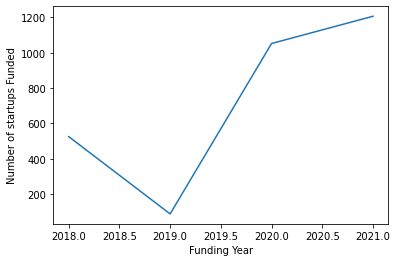

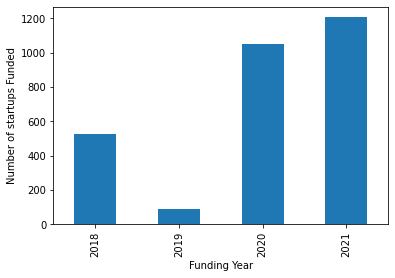

2018     526
2019      89
2020    1052
2021    1206
Name: Funding_Year, dtype: int64

In [34]:
# Total investment counts per year

Total_investment_counts = data['Funding_Year'].value_counts()
Total_investment_counts = Total_investment_counts.sort_index()
Total_investment_counts.plot.line(x=Total_investment_counts.index, y=Total_investment_counts.values,
                                  xlabel= 'Funding Year', ylabel='Number of startups Funded')

plt.show()

Total_investment_counts.plot.bar(x=Total_investment_counts.index, y=Total_investment_counts.values,
                                  xlabel= 'Funding Year', ylabel='Number of startups Funded')

plt.show()
display(Total_investment_counts)


**From the diagrams above,the number of startups funded fell from 526 in 2018 to 89 in 2019. It then rose to 1052 in 2020, then rose again to 1206 in 2022. The year 2022 is therfore the year with the highest number of startups getting funding.

# Q2.	Which year has seen the most funding in terms of funding amount?

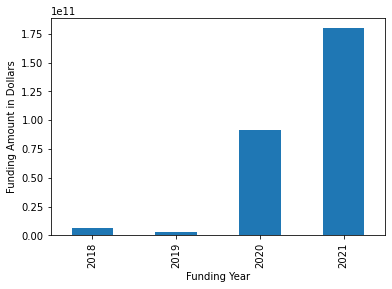

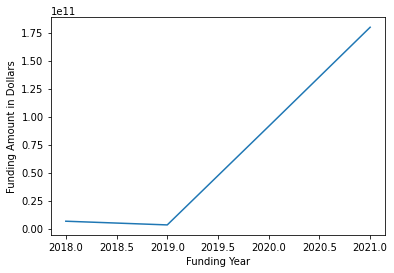

Funding_Year
2018      6641773177
2019      3336433200
2020     91359563655
2021    179813412000
Name: sum, dtype: int64

In [35]:
#SUM of Funding Value by Years(Total investment per year )

data['Amount($)']= data['Amount($)'].apply(int)
total = data.groupby(['Funding_Year'])['Amount($)'].agg(["sum"])
total_investment = total["sum"]
total_investment = total_investment.sort_index()
total_investment.plot.bar(x=total_investment.index, y=total_investment.values, 
                          ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')

plt.show()
total_investment.plot.line(x=total_investment.index, y=total_investment.values, 
                          ylabel= 'Funding Amount in Dollars',xlabel='Funding Year')
plt.show()
display(total_investment)

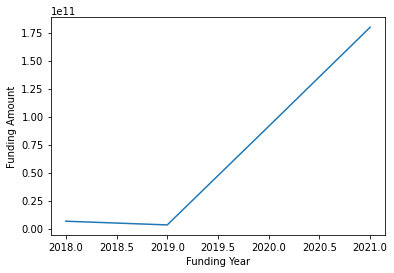

,sum
Funding_Year,
2018,6641773177
2019,3336433200
2020,91359563655
2021,179813412000


In [36]:
#Total investment per year 
#SUM of Funding Value by Years
total = data.groupby('Funding_Year')['Amount($)'].agg(["sum"])

sr = total["sum"]
sr = sr.sort_index()
sr.plot.line(x=sr.index, y=sr.values, xlabel='Funding Year', ylabel='Funding Amount')
#plt.xlim(0, 5)
#plt.ylim(100, 20000)
#plt.rcParams["figure.figsize"] = (15,10.5)
plt.show()
display(total)


 From the diagrams above, 2021 has the most funding with a total amount of $ 179,813,412,000 invested in Indian startups, followed by 2020, with a total of $ 91,359,563,655 invested. 2018 had the third highest amount of $ 6,641,773,177 with 2019 having the least amount of $ 3,336,433,200 invested in Indian startups. These figures are consistent with the number of startups funded

# Q3.	How much funds do startups generally get in India?

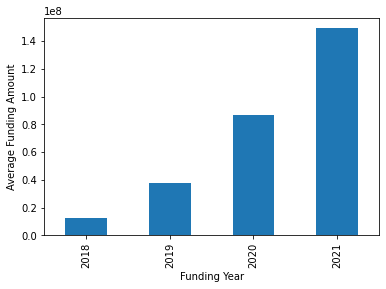

Funding_Year
2018    12626945.203422053
2019    37488013.483146064
2020    86843691.687262356
2021   149099014.925373137
Name: mean, dtype: float64

In [37]:
#Average investment per year 
#Average of Funding Value by Years
data['Amount($)']= data['Amount($)'].apply(int)
total = data.groupby('Funding_Year')['Amount($)'].agg(["sum", "mean"])
average_funding = total["mean"]
average_funding = average_funding.sort_index(ascending= True)
average_funding.plot.bar(x=average_funding.index, y=average_funding.values,
                         xlabel='Funding Year',ylabel='Average Funding Amount')

plt.show()
display(average_funding)

In [38]:
#Average of Funding Value 
Total_average_funding = data['Amount($)'].agg(["mean"])
display(Total_average_funding)

mean   97859791.866341799
Name: Amount($), dtype: float64

On average over the 4years the amount received by startups in India was $97,859,791.87.
The average in 2018 was $12,626,945.20, 2019 was $37,488,013.48. It was $86,843,691.69 in 2020 and $149,099,014.93 in 2021


# Q4.	What type of funding do startups in India generally receive?

# Getting rid of duplicate names in the sector column and calculating startup count by Stage

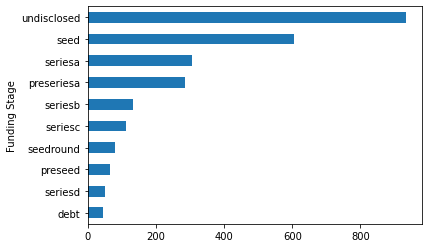

debt            45
seriesd         50
preseed         66
seedround       79
seriesc        114
seriesb        134
preseriesa     286
seriesa        305
seed           606
undisclosed    935
Name: clean_1, dtype: int64

In [39]:
data['clean_1'] = data['Stage'].str.replace("-",'')
data['clean_1'] = data['clean_1'].str.lower()
data['clean_1'] = data['clean_1'].str.strip()
data['clean_1'] = data['clean_1'].str.replace(' ','')


#startup count by stage
funding_type =data['clean_1'].value_counts()
funding_type = funding_type.head(10).sort_values(ascending=True)
funding_type.head(10).plot.barh(x=funding_type.index, y=funding_type.values,xlabel="Funding Stage", ylabel="Number of Startups")

plt.show()
display(funding_type)


Seed funding is the highest type of funding over the 4 year period with 606 startups getting seed funding. 305 startups got Series A funding whiles 286 startups got Pre series A funding. 1347 startups got series B funding, 114 Series C, 66 Pre Seed, 50 Series D and 45 debt funding.


#  Q5.	Which cities get the highest number of startups and most funding by investors?

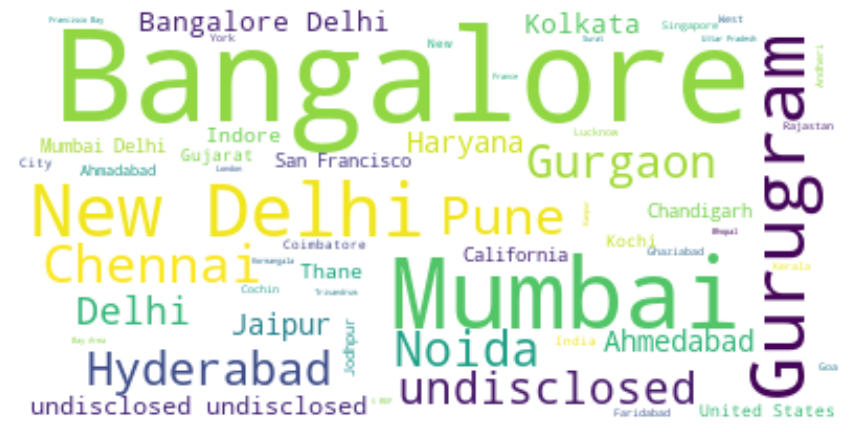

In [40]:
#Using wordcloud to visualize city names
words = data['HeadQuarter'].to_string()

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(words)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


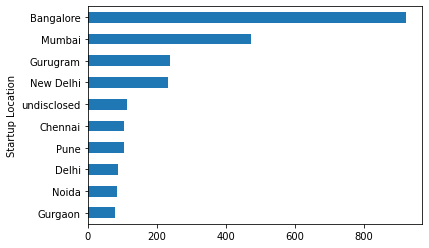

Gurgaon         79
Noida           86
Delhi           88
Pune           105
Chennai        106
undisclosed    114
New Delhi      232
Gurugram       239
Mumbai         472
Bangalore      922
Name: HeadQuarter, dtype: int64

In [41]:
#startup count by location
cities =data['HeadQuarter'].value_counts()
cities = cities.head(10).sort_values(ascending=True)
cities.head(10).plot.barh(x=cities.index, y=cities.values,xlabel="Startup Location",ylabel="Number of Startups")

plt.show()
display(cities)

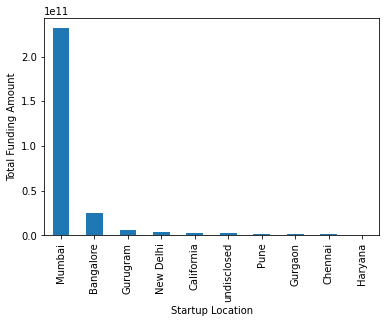

HeadQuarter
Mumbai         231494372742
Bangalore       24871950210
Gurugram         5581118500
New Delhi        3422946040
California       3078300000
undisclosed      2203103300
Pune             1396138705
Gurgaon          1388756180
Chennai          1123975826
Haryana           918985000
Name: sum, dtype: int64

In [42]:
#Total Funding Value by location
data['Amount($)']= data['Amount($)'].apply(int)
total = data.groupby('HeadQuarter')['Amount($)'].agg(["sum",'mean'])
location_amount = total["sum"]
location_amount = location_amount.sort_values(ascending= False)
location_amount.head(10).plot.bar(x=location_amount.index, y=location_amount.values, 
                         xlabel='Startup Location',ylabel='Total Funding Amount')

plt.show()
location_amount.head(10)

**Bangalore is the city with the highest number of startups. The city has 922 startups followed by Mumbai with 472 and Gurugram with 239.
Interms of investment amount, Mumbai is the city with the highest amount of funding at $231494372742. Bangalore is in a distance second with $24871950210 and Gurugram city third with $5581118500.


# Q6.	Which industries get more funding?

# Getting rid of duplicate names in the sector column and calculating startup count by SECTOR

fintech              260
edtech               222
ecommerce            117
healthcare            95
financialservices     88
agritech              63
healthtech            60
automotive            54
undisclosed           48
food&beverages        39
Name: clean_2, dtype: int64

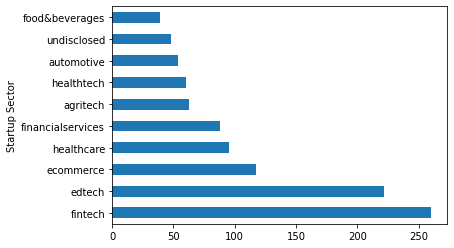

In [43]:

df1= data

data['clean_2'] = data['Sector'].str.replace("-",'')
data['clean_2'] = data['clean_2'].str.lower()
data['clean_2'] = data['clean_2'].str.strip()
data['clean_2'] = data['clean_2'].str.replace(' ','')

# Calculating startup count by SECTOR
sector_count= df1['clean_2'].value_counts().head(20)
sector_count.head(10).plot.barh(x= sector_count.index,y=sector_count.values,xlabel="Startup Sector",ylabel="Number of Startups")
plt.show
display(sector_count.head(10))


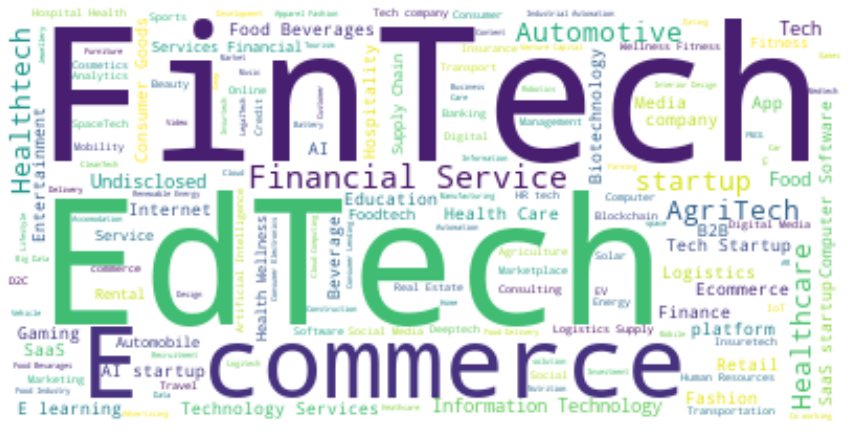

In [44]:
#Using wordcloud to visualize sector
words = data['Sector'].to_string()

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(words)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


The Fintech sector is the sector with the highest number of startup funding(260), followed by the Edtech sector with 222 startups, E-commerce has 117 startups whiles the healthcare sector has 95 startups.

# Hypothesis Testing

**The following hypothesis will be tested

H1: Startup location and number of funding are positively correlated.

H0: Startup location has no relation with it getting funding/ Startup location has no relation with it receiving funding.


H1: The funding amount is positively related to the stage of funding.

H0: There is no relation between the funding amount and the stage of funding.


# NB
Since our target variables are numeric (Amount) and the predictors are categorical(Headquaters and Stage), this is a regression problem and hence we will use Analysis of Variance (ANOVA) test for our hypothesis.

Accept Null hypothesis if P-value>0.05. Means variables are NOT correlated
Reject Null hypothesis if P-value<0.05. Means variables are correlated


P-Value for Anova is:  0.9999999999999999
F-statistic for Anova is:  0.06479219991479161


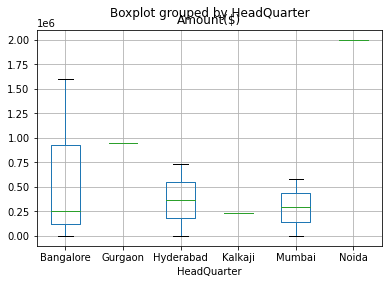

In [45]:
#Regression analysis using ANOVA TEST
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway

Data = data.loc[:,['HeadQuarter','Amount($)']]
ColumnNames =['HeadQuarter','Amount($)']
test_Data=pd.DataFrame(data=Data,columns=ColumnNames)
CategoryGroupLists=test_Data.groupby('HeadQuarter')['Amount($)'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])
print('F-statistic for Anova is: ', AnovaResults[0])

#creating boxplot of points
test_Data.head(10).boxplot(column=['Amount($)'], by='HeadQuarter', )
plt.show()

From the output, the P-value 0.9999 > 0.05. This implies that, variables are NOT correlated hence there is no relationship between location and funding amount. We therefore accept the Null hypothesis that, Startup location has no relation with it receiving funding

P-Value for Anova is:  0.980025270752648
F-statistic for Anova is:  0.6893800230187526


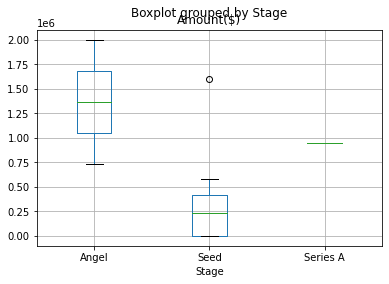

In [46]:
#Regression analysis using ANOVA TEST
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway

Data = data.loc[:,['Stage','Amount($)']]
ColumnNames =['Stage','Amount($)']
test_Data=pd.DataFrame(data=Data,columns=ColumnNames)
CategoryGroupLists=test_Data.groupby('Stage')['Amount($)'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])
print('F-statistic for Anova is: ', AnovaResults[0])

#creating boxplot of points
test_Data.head(10).boxplot(column=['Amount($)'], by='Stage', )
plt.show()

From the output, the P-value of 0.9800 is > 0.05. This implies that, variables are NOT correlated hence there is no relationship between location and funding amount. We therefore accept the Null hypothesis that,there is no relation between the funding amount and the stage of funding

# Conclusions
From our analysis of the Indian startup data from 2018 to 2021, the year 2021 saw the most funding in terms of funding amount and also the number of starups funded. On average over the 4years, the amount received by startups in India was $97,859,791.87.
Seed funding is the highest type of funding over the 4 year period with 606 startups getting seed funding. The Fintech sector is the sector with the highest number of startup funding(260), followed by the Edtech sector with 222 startups.
Although there are alot of startups concentrated in cities like Bangalore and Mumbai, there is no direct relationship between the location of a startup and it ability to get funding. There is also no direct relationship between the stage of funding and funding amount.